## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

### Import Library

Import the necessary libraries

In [1]:
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score

### Load Dataset
The dataset that we will use is a **Property Dataset**. In this dataset there will be 11 features including: <br>
- Area Category,
- Luas Tanah (m2),
- Luas Bangunan (m2),
- Jumlah Kamar,
- Jumlah Kamar Mandi,
- Tingkat/Lantai,
- Harga Penawaran (dari Owner),
- Terjual/Belum,
- Arah Hadap Rumah,
- Posisi Rumah,
- Lebar Jalan Depan Rumah (ROW). <br>

You can get the dataset from **Elearn**

Load dataset

In [2]:
url = "https://raw.githubusercontent.com/eabigails/Week9_DM/refs/heads/main/property_dataset.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [3]:
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,307.000000,306.000000,306.000000
mean,226.908795,266.579805,4.276873,3.339869,1.856209
std,202.149571,213.501196,1.646412,1.632311,0.512702
min,14.000000,14.000000,1.000000,1.000000,1.000000
25%,96.000000,120.000000,3.000000,2.000000,2.000000
50%,162.000000,200.000000,4.000000,3.000000,2.000000
75%,286.000000,332.500000,5.000000,4.000000,2.000000
max,1561.000000,1200.000000,13.000000,13.000000,4.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [5]:
df.isnull().sum()

Area Category                      1
Nama Daerah                        1
Luas Tanah (m2)                    1
Luas Bangunan (m2)                 1
Jumlah Kamar                       1
Jumlah Kamar Mandi                 2
Tingkat/Lantai                     2
Harga Penawaran (dari Owner)       1
Terjual/Belum                      1
Arah Hadap Rumah                  83
Posisi Rumah                     116
Lebar Jalan Depan Rumah (ROW)     42
dtype: int64

2.

In [6]:
null_percentage = df.isnull().mean() * 100
null_percentage

Area Category                     0.324675
Nama Daerah                       0.324675
Luas Tanah (m2)                   0.324675
Luas Bangunan (m2)                0.324675
Jumlah Kamar                      0.324675
Jumlah Kamar Mandi                0.649351
Tingkat/Lantai                    0.649351
Harga Penawaran (dari Owner)      0.324675
Terjual/Belum                     0.324675
Arah Hadap Rumah                 26.948052
Posisi Rumah                     37.662338
Lebar Jalan Depan Rumah (ROW)    13.636364
dtype: float64

Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df= pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [8]:
df.isnull().sum()

Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

Drop the column 'Nama Daerah' because all the values are different.

In [9]:
df = df.drop(columns=['Nama Daerah'])
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


3.

In [10]:
le = LabelEncoder()
df['Arah Hadap Rumah'] = le.fit_transform(df['Arah Hadap Rumah'])
df['Posisi Rumah'] = le.fit_transform(df['Posisi Rumah'])

df['Terjual/Belum'] = df['Terjual/Belum'].map({'Terjual': 0, 'Belum': 1})
df['Area Category'] = df['Area Category'].map({'Sangat Premium': 1, 'Premium': 2, 'Standard': 3, 'Below Standard': 4})
df['Lebar Jalan Depan Rumah (ROW)'] = df['Lebar Jalan Depan Rumah (ROW)'].map({'< 1 Mobil': 1, '1-2 Mobil': 2, '> 2 Mobil': 3})
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2.0,3500000000,1,3,2,2
1,4,30.0,60.0,2.0,1.0,2.0,287799000,1,3,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,1,1,0,2
3,1,187.0,250.0,5.0,5.0,2.0,3100000000,1,3,2,2
4,2,350.0,600.0,5.0,5.0,2.0,5000000000,1,0,2,2


To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:

Replace empty values (" ") with "10500000000".

Replace values with commas like "10.500.000.000,00" with "10500000000".

In [11]:
df['Harga Penawaran (dari Owner)'].replace(" ", "10500000000", inplace=True)

# Step 2: Replace values formatted with commas and periods
# This will replace values like "10.500.000.000,00" with "10500000000"
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].str.replace('.', '', regex=False)  # Remove dots
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].str.replace(',', '', regex=False)  # Remove commas

# Display the cleaned column to verify changes
print(df['Harga Penawaran (dari Owner)'].head())

0    3500000000
1     287799000
2    2699999999
3    3100000000
4    5000000000
Name: Harga Penawaran (dari Owner), dtype: object


check the data type

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    int64 
 1   Luas Tanah (m2)                308 non-null    object
 2   Luas Bangunan (m2)             308 non-null    object
 3   Jumlah Kamar                   308 non-null    object
 4   Jumlah Kamar Mandi             308 non-null    object
 5   Tingkat/Lantai                 308 non-null    object
 6   Harga Penawaran (dari Owner)   308 non-null    object
 7   Terjual/Belum                  308 non-null    int64 
 8   Arah Hadap Rumah               308 non-null    int32 
 9   Posisi Rumah                   308 non-null    int32 
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64 
dtypes: int32(2), int64(3), object(6)
memory usage: 24.2+ KB


Change the data types from:

- float to int
- object to int

In [13]:
# Convert object columns to int64
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    # Convert to integer if possible
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('int64')

# Convert existing int32 columns to int64
int32_columns = df.select_dtypes(include=['int32']).columns
for col in int32_columns:
    df[col] = df[col].astype('int64')

# Convert a specific column to int64
df['Harga Penawaran (dari Owner)'] = pd.to_numeric(df['Harga Penawaran (dari Owner)'], errors='coerce').astype('int64')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area Category                  308 non-null    int64
 1   Luas Tanah (m2)                308 non-null    int64
 2   Luas Bangunan (m2)             308 non-null    int64
 3   Jumlah Kamar                   308 non-null    int64
 4   Jumlah Kamar Mandi             308 non-null    int64
 5   Tingkat/Lantai                 308 non-null    int64
 6   Harga Penawaran (dari Owner)   308 non-null    int64
 7   Terjual/Belum                  308 non-null    int64
 8   Arah Hadap Rumah               308 non-null    int64
 9   Posisi Rumah                   308 non-null    int64
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64
dtypes: int64(11)
memory usage: 26.6 KB


4.

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df1 = pd.DataFrame(sc.fit_transform(df), columns=["Area Category", "Luas Tanah (m2)","Luas Bangunan (m2)","Jumlah Kamar","Jumlah Kamar Mandi","Tingkat/Lantai ","Harga Penawaran (dari Owner)","Terjual/Belum","Arah Hadap Rumah","Posisi Rumah","Lebar Jalan Depan Rumah (ROW)"])
df1.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,0.494434,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,0.0,0.839497,-0.188069,-0.598758
1,1.742677,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0.0,0.839497,-0.188069,-2.406773
2,0.494434,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,0.0,-1.141845,-5.453988,-0.598758
3,-2.002052,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,0.0,0.839497,-0.188069,-0.598758
4,-0.753809,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,0.0,-2.132516,-0.188069,-0.598758


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

In [16]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans

sse=[]
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df1)
    sse.append(kmeans.inertia_)

c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

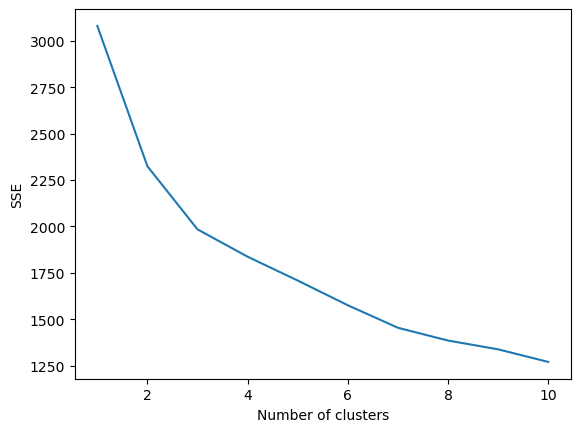

In [17]:
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [18]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
best_k = kneedle.elbow
print("The best k for you model is", best_k)

The best k for you model is 3


Train the K-Means model on the dataset with the number of clusters you have determined.

In [19]:
# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=best_k, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df1)
y_pred
# Add the cluster labels to the original data
df['Cluster'] = y_pred

c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [20]:
cluster_summary = df.groupby(y_pred)[['Area Category', 'Terjual/Belum', 'Arah Hadap Rumah', 
                                              'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']].agg(pd.Series.mode)


# Rename the index for better readability
cluster_summary = cluster_summary.rename_axis('KMeans')

# Display the result
cluster_summary

,Area Category,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
KMeans,,,,,
0,2,1,3,2,2
1,1,1,3,2,3
2,3,1,3,2,2


In [21]:
df.groupby(y_pred)["Luas Tanah (m2)", "Luas Bangunan (m2)", "Jumlah Kamar", "Jumlah Kamar Mandi", "Tingkat/Lantai " , "Harga Penawaran (dari Owner)"].agg(pd.Series.mean)

C:\Users\yulia\AppData\Local\Temp\ipykernel_10564\2886233327.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(y_pred)["Luas Tanah (m2)", "Luas Bangunan (m2)", "Jumlah Kamar", "Jumlah Kamar Mandi", "Tingkat/Lantai " , "Harga Penawaran (dari Owner)"].agg(pd.Series.mean)


,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
0,187.378205,243.814103,4.634615,3.673077,2.019231,3.544236e+09
1,570.680000,642.220000,6.260000,5.300000,1.980000,1.675630e+10
2,118.980392,117.588235,2.754902,1.862745,1.500000,1.506754e+09


In [22]:
df.groupby("Cluster")["Cluster"].agg(pd.Series.count)

Cluster
0    156
1     50
2    102
Name: Cluster, dtype: int64

## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

Plot the dendrogram to help determine the number of clusters, using the 'max' method.

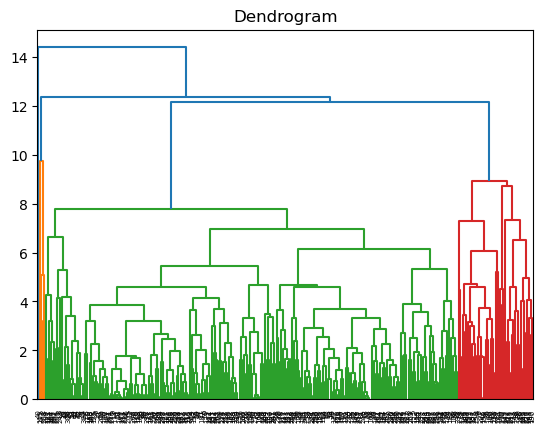

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure()
plt.title("Dendrogram")
linkage_data = linkage(df1, method='complete')
dendrogram(linkage_data)
plt.show()

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters equal to the number of clusters from the K-Means model.

In [24]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
label = model.fit_predict(df1)
label

c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 2, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 1,
       0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 1,
       0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2,
       1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 2,

In [25]:
agglomerative_model = AgglomerativeClustering(n_clusters=best_k, affinity='euclidean', linkage='ward')
df1['Agglomerative_Cluster'] = agglomerative_model.fit_predict(df1)
df1.head()

c:\Users\yulia\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Agglomerative_Cluster
0,0.494434,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,0.0,0.839497,-0.188069,-0.598758,1
1,1.742677,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0.0,0.839497,-0.188069,-2.406773,2
2,0.494434,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,0.0,-1.141845,-5.453988,-0.598758,0
3,-2.002052,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,0.0,0.839497,-0.188069,-0.598758,0
4,-0.753809,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,0.0,-2.132516,-0.188069,-0.598758,0


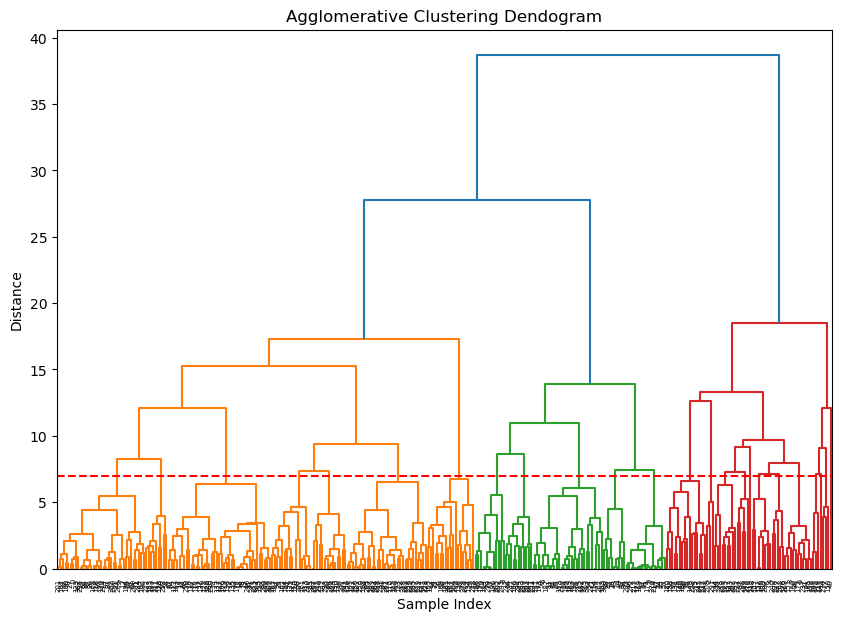

In [26]:
linked = linkage(df1, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Agglomerative Clustering Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.axhline(y=7, color='r', linestyle='--')  # Optional: Add a horizontal line to indicate the cut-off for clusters
plt.show()

Display the cluster summary in the form of a dataframe with the same criteria as the previous summary

In [27]:
df1["Agglo"] = label
df.groupby(y_pred)["Area Category","Terjual/Belum","Arah Hadap Rumah", "Posisi Rumah", "Lebar Jalan Depan Rumah (ROW)"].agg(pd.Series.mode)

C:\Users\yulia\AppData\Local\Temp\ipykernel_10564\201023715.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(y_pred)["Area Category","Terjual/Belum","Arah Hadap Rumah", "Posisi Rumah", "Lebar Jalan Depan Rumah (ROW)"].agg(pd.Series.mode)


,Area Category,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,2,1,3,2,2
1,1,1,3,2,3
2,3,1,3,2,2


In [28]:
df.groupby(label)["Luas Tanah (m2)", "Luas Bangunan (m2)", "Jumlah Kamar", "Jumlah Kamar Mandi", "Tingkat/Lantai " , "Harga Penawaran (dari Owner)"].agg(pd.Series.mean)

C:\Users\yulia\AppData\Local\Temp\ipykernel_10564\1379623355.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(label)["Luas Tanah (m2)", "Luas Bangunan (m2)", "Jumlah Kamar", "Jumlah Kamar Mandi", "Tingkat/Lantai " , "Harga Penawaran (dari Owner)"].agg(pd.Series.mean)


,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
0,511.848485,572.484848,6.030303,4.909091,1.954545,1.383303e+10
1,163.090361,218.156627,4.301205,3.451807,2.048193,3.094804e+09
2,119.026316,107.131579,2.697368,1.723684,1.289474,1.548517e+09


In [29]:
df1.groupby(label)["Agglo"].agg(pd.Series.count)

0     66
1    166
2     76
Name: Agglo, dtype: int64

**Hierarchical Visualization**

Single Linkage

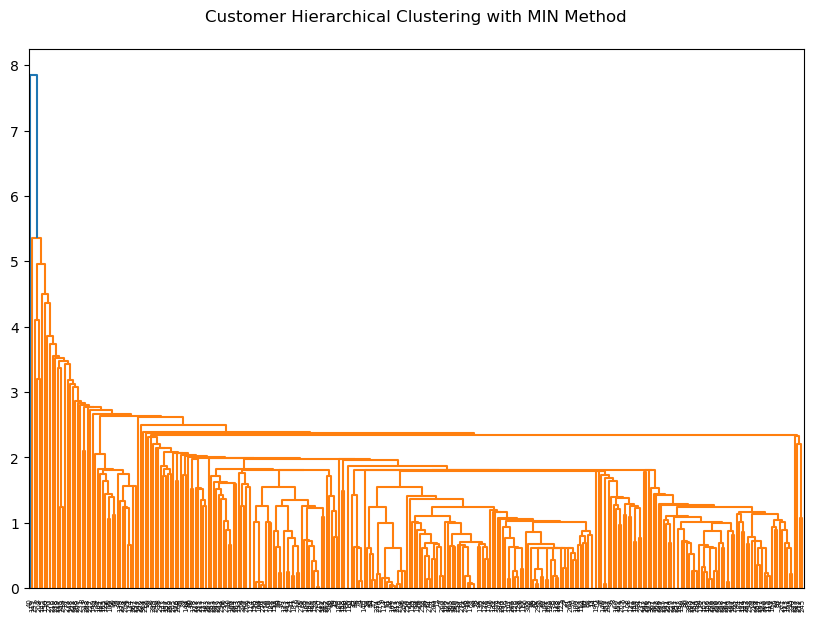

In [30]:
# example
import scipy.cluster.hierarchy as hie

plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with MIN Method", pad=20)
dendro = hie.dendrogram(hie.linkage(df1, method="single"))

complete linkage

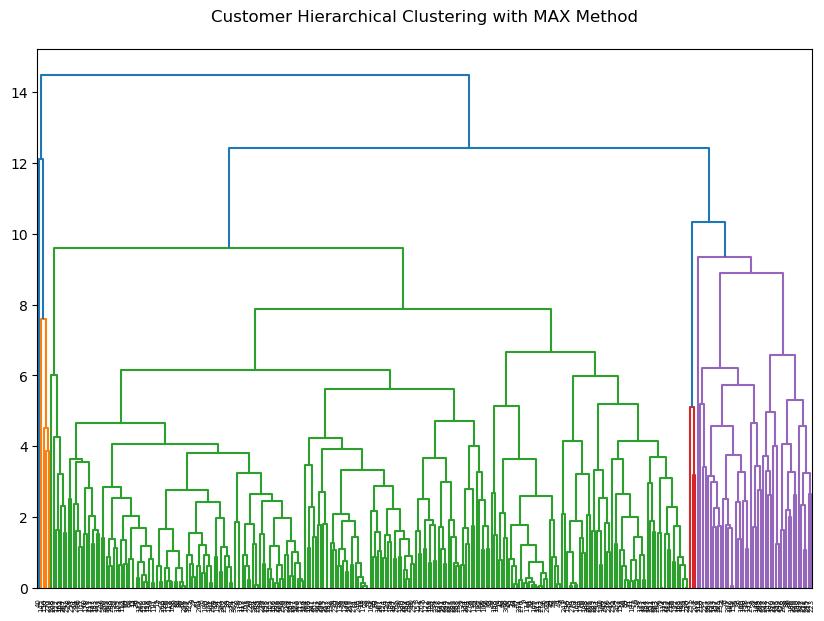

In [31]:
# example
import scipy.cluster.hierarchy as hie

plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with MAX Method", pad=20)
dendro = hie.dendrogram(hie.linkage(df1, method="complete"))

average linkage

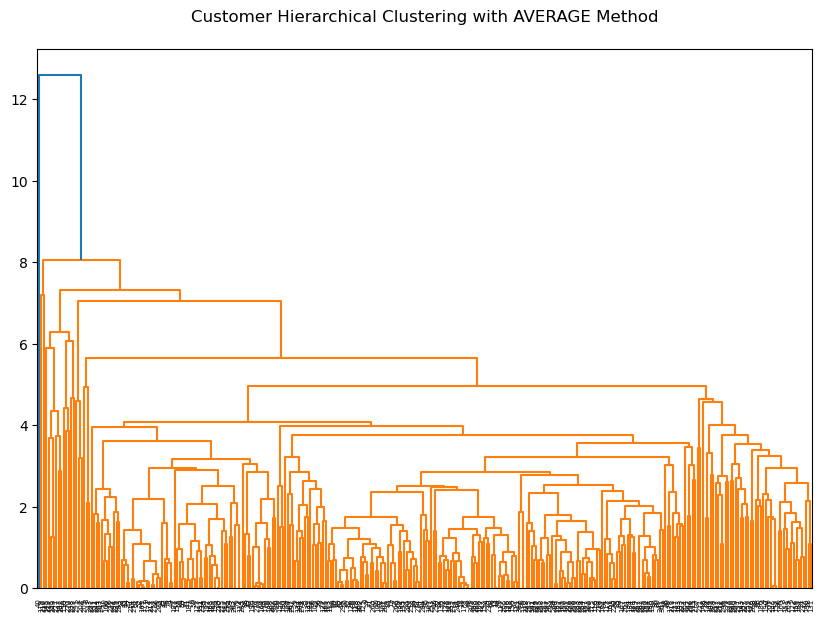

In [32]:
# example
import scipy.cluster.hierarchy as hie

plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with AVERAGE Method", pad=20)
dendro = hie.dendrogram(hie.linkage(df1, method="average"))

ward linkage

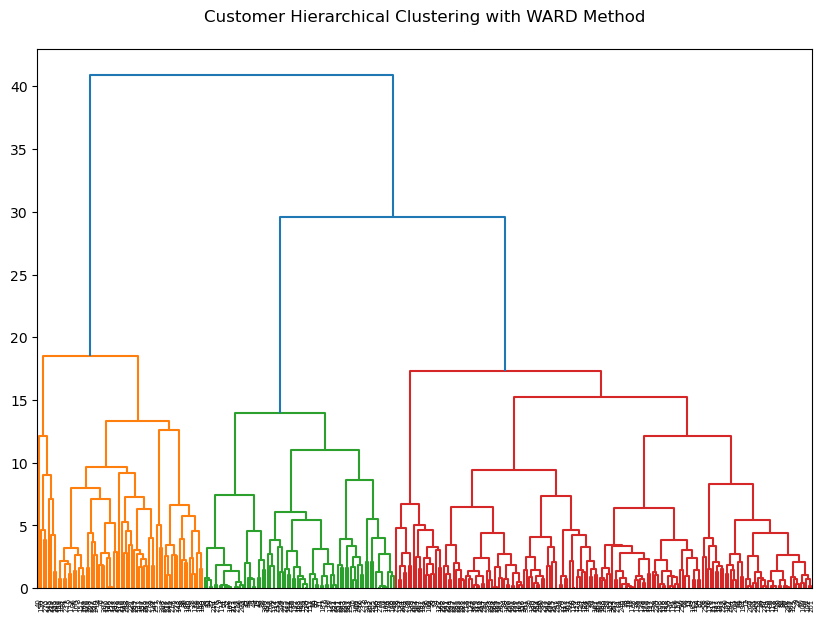

In [33]:
# example
import scipy.cluster.hierarchy as hie

plt.figure(figsize=(10,7))
plt.title("Customer Hierarchical Clustering with WARD Method", pad=20)
dendro = hie.dendrogram(hie.linkage(df1, method="ward"))